Endert Guerrero IPE 100108868-3

Módulo: 4 

Asignatura: Procesamiento de Datos 

RA: Examina los datos mediante análisis exploratorios, aplicando las librerías base específicas, a partir de casos prácticos. 

Docente Online: Gonzalo Esteban Cárdenas Rubio 

# Librerías

In [105]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# DataFrame

Importamos el DataFrame de la actividad del M3 y solucionamos sus errores.

In [106]:
Ventas_Clientes_2021 = pd.Series([100.0,200.0,"110,0",90.0,150.0,80.0,70.0,100.0,100.00,110.0,90.0,"100,00"])
Ventas_Clientes_2021 = Ventas_Clientes_2021.replace({',': '.', '"': ''}, regex=True).astype(float)

Clientes_2021 = pd.Series (["JUan","camila","DanIel","Luis","Juan","Ana","Camila","Ana","LuiS","Juan","Ana","Juan"])
Clientes_2021 = Clientes_2021.str.title()

# Ítem 1

## Creamos y mostramos en pantalla el DataFrame

In [107]:
df = pd.DataFrame({"Clientes":Clientes_2021,"Ventas":Ventas_Clientes_2021})
print(df)

   Clientes  Ventas
0      Juan   100.0
1    Camila   200.0
2    Daniel   110.0
3      Luis    90.0
4      Juan   150.0
5       Ana    80.0
6    Camila    70.0
7       Ana   100.0
8      Luis   100.0
9      Juan   110.0
10      Ana    90.0
11     Juan   100.0


## Agrupamos por clientes y organizamos de mayor a menor

Ahora crearemos un nuevo DataFrame ("df2") donde agruparemos a los clientes y sumaremos sus compras.

In [108]:
df2 = df.groupby("Clientes").sum()
print(df2)

          Ventas
Clientes        
Ana        270.0
Camila     270.0
Daniel     110.0
Juan       460.0
Luis       190.0


También podemos disponer dicho DataFrame de forma descendente para que, al mostrarlo en pantalla, podamos ver cuánto fue el total de las compras realizadas por el cliente organizado jerárquicamente según dicho total. 

In [109]:
jerarquia = df2.sort_values(by="Ventas", ascending = 0)
print(jerarquia)

          Ventas
Clientes        
Juan       460.0
Ana        270.0
Camila     270.0
Luis       190.0
Daniel     110.0


## Generamos un gráfico de barras.

Usaremos la función plot de matplotlib agregando el valor "bar" para obtener el gráfico deseado, haciéndolo de esta forma nos ahorramos el código para separar el indice de sus valores para generar los ejes, también asi nos genera automáticamente el "label" de "Clientes". agregaremos el color en este caso "darkblue" en la misma función "df2.plot", especificaremos el "ylabel" y "title" para asi tener un gráfico mas completo.

en este ejemplo la separación y ancho de las barras se genera automáticamente pero esto valores también los podemos modificar agregando "width" en la función "df2.plot" o usando la función "plt.bar()".

En el ejemplo de estudio no existe una leyenda como se puede ver en este en la parte superior derecha, esta la podemos modificar usando la función "plt.legend", para este caso debemos acompañar la función con ".set_visible(False)".

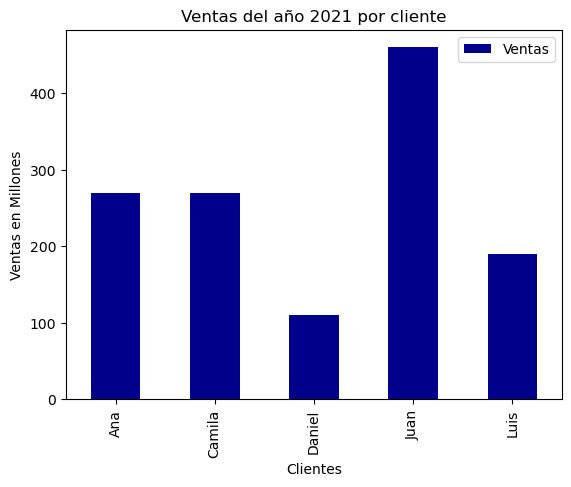

In [110]:
df2.plot(kind = "bar", color = "darkblue")
plt.ylabel("Ventas en Millones")
plt.title("Ventas del año 2021 por cliente")

plt.show()

# Ítem 2

## Análisis de los datos

Ahora realizaremos un análisis y mostraremos los resultados para asi sacar conclusiones mas fácilmente.

Primero mostraremos la media, mínimo, máximo y desviación estándar usando las funciones pertinentes que nos ofrece Pandas para realizar esta operaciones.


In [111]:
med_gral = df["Ventas"].mean()
min_gral = df["Ventas"].min()
max_gral = df["Ventas"].max()
des_est = df["Ventas"].std()

print("Media de ventas durante 2021 en millones:", med_gral)
print("Menor venta durante 2021 en millones:", min_gral)
print("Mayor venta durante 2021 en millones:", max_gral)
print("Desviación estándar de las ventas durante 2021:", des_est)

Media de ventas durante 2021 en millones: 108.33333333333333
Menor venta durante 2021 en millones: 70.0
Mayor venta durante 2021 en millones: 200.0
Desviación estándar de las ventas durante 2021: 34.859023439441266


A partir de este análisis general podemos llegar a las siguientes conclusiones: 

    - La media de las ventas durante 2021 fue de 108.33 millones.

    - La venta individual mas pequeña durante el mismo ciclo fue de 70.0 millones.

    - La venta individual mas grande del 2021 fue de 200.00 millones

    - La desviación estándar nos indica cuán dispersos están los datos en torno a la media, como podemos ver en el caso presentan una dispersion de 34.85 millones, esto significa que las ventas individuales se desvían en promedio aproximadamente 34.85 millones de la media de las ventas.


# Ítem 3

Para hallar datos atípicos debemos hacer un estudio mas completo de los datos por lo comenzare por hacer un estudio individual por clientes.

## Estudio individual

También podemos generar la media, mínimo y máximo de las compras para cada cliente individualmente haciendo uso de "groupby" nuevamente.

### Media

Media de compras por cliente:
Clientes
Ana        90.0
Camila    135.0
Daniel    110.0
Juan      115.0
Luis       95.0
Name: Ventas, dtype: float64


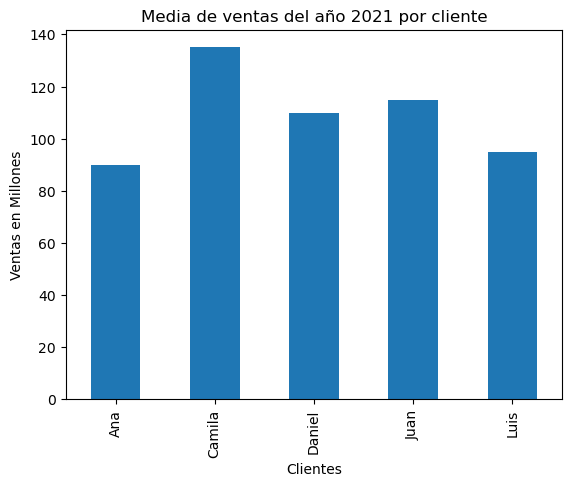

In [112]:
med_ind = df.groupby("Clientes")["Ventas"].mean()
print("Media de compras por cliente:")
print(med_ind)

med_ind.plot(kind="bar")

plt.ylabel("Ventas en Millones")
plt.title("Media de ventas del año 2021 por cliente")

plt.show()

La media individual nos muestra que el cliente con mejor media fue Camila, mientras que el peor fue Ana, estos datos los podríamos comparar con la cantidad de compras que realizo cada cliente durante el ciclo para obtener un análisis mas profundo.

### Mínimo

Menor compra por cliente:
Clientes
Ana        80.0
Camila     70.0
Daniel    110.0
Juan      100.0
Luis       90.0
Name: Ventas, dtype: float64


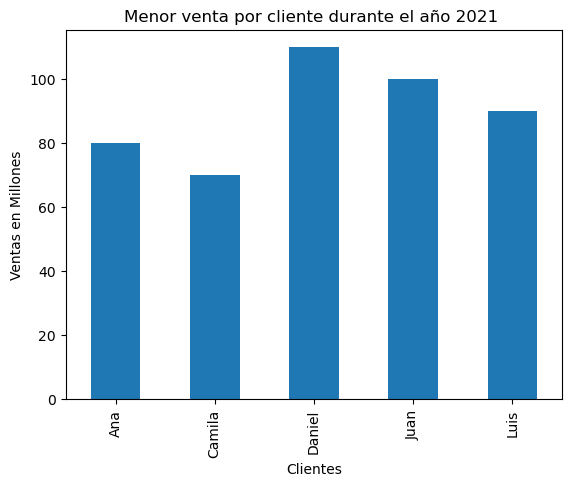

In [113]:
min_ind = df.groupby("Clientes")["Ventas"].min()
print("Menor compra por cliente:")
print(min_ind)

min_ind.plot(kind="bar")

plt.ylabel("Ventas en Millones")
plt.title("Menor venta por cliente durante el año 2021 ")

plt.show()

Ahora podemos ver que la menor compra individual la realizo Camila dato de bastante valor, mientras que Daniel entre las compras que hizo la menor valor fue la mas alta en esta escala, pero también estos datos los podemos correlacionar con la cantidad de comprar realizadas por los clientes.

### Máximo

Mayor compra por cliente:
Clientes
Ana       100.0
Camila    200.0
Daniel    110.0
Juan      150.0
Luis      100.0
Name: Ventas, dtype: float64


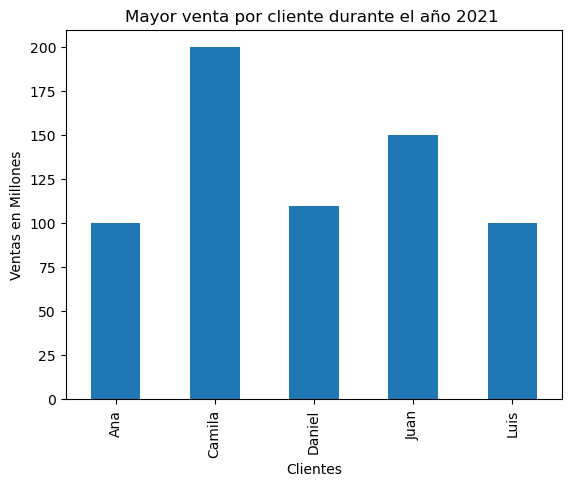

In [114]:
max_ind = df.groupby("Clientes")["Ventas"].max()
print("Mayor compra por cliente:")
print(max_ind)

max_ind.plot(kind="bar")

plt.ylabel("Ventas en Millones")
plt.title("Mayor venta por cliente durante el año 2021 ")

plt.show()

Parecido al estudio anterior podemos ver la mayor compra individual realizada por cliente, Camila realizo la compra individual de mayor valor.

## Correlaciones de los datos obtenidos

Ahora mostrare los datos en un mismo DataFrame para poder estudiarlo y llegar a mejores conclusiones, ademas de agregar un dato muy importante, Cantidad de transacciones realizada por el cliente.

In [115]:
cant_compras = df["Clientes"].value_counts()

corr_cant_compras = pd.DataFrame({"Media": med_ind, "Menor compra": min_ind, "Mayor compra": max_ind, "Cantidad de compras": cant_compras})
print(corr_cant_compras)

        Media  Menor compra  Mayor compra  Cantidad de compras
Ana      90.0          80.0         100.0                    3
Camila  135.0          70.0         200.0                    2
Daniel  110.0         110.0         110.0                    1
Juan    115.0         100.0         150.0                    4
Luis     95.0          90.0         100.0                    2


Como dije anteriormente Camila tiene la compra de mayor y menor valor, este dato nos puede ayudar a entender cual puede ser el dato atípico.

# Datos Atípicos

Ahora a traves de un boxplot podemos ver si existe un outlier y si uno o este es Camila.

## Boxplot

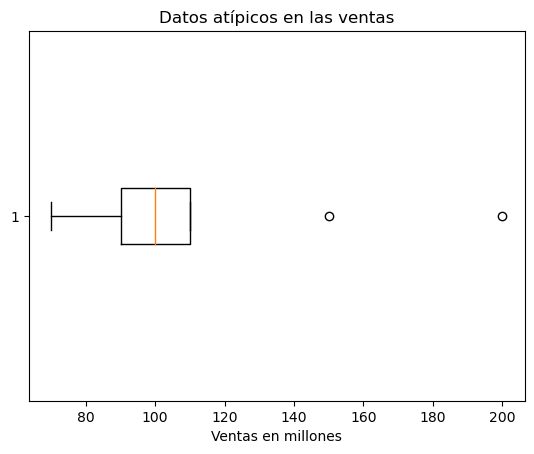

   Clientes  Ventas
0      Juan   100.0
1    Camila   200.0
2    Daniel   110.0
3      Luis    90.0
4      Juan   150.0
5       Ana    80.0
6    Camila    70.0
7       Ana   100.0
8      Luis   100.0
9      Juan   110.0
10      Ana    90.0
11     Juan   100.0


In [116]:
plt.boxplot(df["Ventas"], vert=False)
plt.title("Datos atípicos en las ventas")
plt.xlabel("Ventas en millones")
plt.show()

print(df)

A traves del Boxplot podemos ver que tenemos dos Outliers que a diferencia de lo que pensaba la Venta realizada a Camila por 70 millones no es uno de ellos, pero si la venta por 200 millones, también podemos ver que la venta realizada a Juan por 150 millones es otro outlier, por lo que estos datos los podríamos descartar si asi quisiéramos.

## Encontrar Outliers calculando los Quintiles

También podemos encontrar los Outlies calculando los quintiles de forma manual siguiendo la formula:

    IQR = Q3 - Q1

Esta formula nos calcula el rango intercuartílico, que es igual al tercer cuartil menos el primer cuartil, los cuales hallamos haciendo uso de la función "np.quantile", por lo que no debemos restarlos para hallar dicho rango ya que NumPy lo hace automáticamente a traves de esa función, lo que si debemos hacer ahora es calcular los limites inferior(LI) y superior (LS) según la siguiente formula.
    
    LI = Q1 - 1.5 * IQR (o lo que es lo mismo) Q3 - Q1
    
    LS = Q3 + 1.5 * IQR

Ya habiendo calculado esto podemos mostrar los resultados por pantalla luego de ingresar los resultados de estos quintiles en una nueva variable que llamare Outliers.


In [117]:
Q1 = np.quantile(df["Ventas"], 0.25)
Q3 = np.quantile(df["Ventas"], 0.75)

LI = Q1 - 1.5 * (Q3 - Q1)
LS = Q3 + 1.5 * (Q3 - Q1)

outliers = df[(df["Ventas"] < LI) | (df["Ventas"] > LS)]

print("Valores atípicos:")
print(outliers)

Valores atípicos:
  Clientes  Ventas
1   Camila   200.0
4     Juan   150.0


# Análisis correcto con DataFrame sin Outliers

Ahora crearemos un nuevo DataFrame sin los outliers el cual también podemos mostrar gráficamente, esto lo haremos usando un código similar de la variable "outliers" a diferencia de que invertiremos los operadores de comparación y agregaremos el operado &, haciendo esto nos mostrara los datos dentro del rango deseado.

In [118]:
fin = df[(df["Ventas"] >= LI) & (df["Ventas"] <= LS)]
print(fin)

   Clientes  Ventas
0      Juan   100.0
2    Daniel   110.0
3      Luis    90.0
5       Ana    80.0
6    Camila    70.0
7       Ana   100.0
8      Luis   100.0
9      Juan   110.0
10      Ana    90.0
11     Juan   100.0


## Análisis

In [119]:
media = fin["Ventas"].mean()
minimo = fin["Ventas"].min()
maximo = fin["Ventas"].max()
desviacion_estandar = fin["Ventas"].std()

print("Media de ventas durante 2021 en millones:", media)
print("Menor venta durante 2021 en millones:", minimo)
print("Mayor venta durante 2021 en millones:", maximo)
print("Desviación estándar de las ventas durante 2021:", desviacion_estandar)

Media de ventas durante 2021 en millones: 95.0
Menor venta durante 2021 en millones: 70.0
Mayor venta durante 2021 en millones: 110.0
Desviación estándar de las ventas durante 2021: 12.692955176439847


Ahora según este nuevo análisis de sin Outliers nos dice que:

    - La media de ventas fue de 95.0 millones.
    - La menor venta sigue siendo 70 millones.
    - La mayor venta fue 110 millones.
    - Y la desviación estándar fue de 12.70 millones.

## Media individual

Media de compras por cliente:
Clientes
Ana        90.0
Camila    135.0
Daniel    110.0
Juan      115.0
Luis       95.0
Name: Ventas, dtype: float64


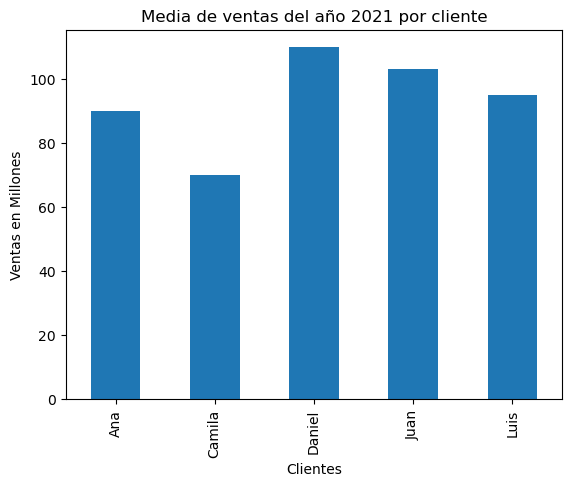

In [120]:
med_ind2 = fin.groupby("Clientes")["Ventas"].mean()
print("Media de compras por cliente:")
print(med_ind)

med_ind2.plot(kind="bar")

plt.ylabel("Ventas en Millones")
plt.title("Media de ventas del año 2021 por cliente")

plt.show()

## Mínimo Individual

Menor compra por cliente:
Clientes
Ana        80.0
Camila     70.0
Daniel    110.0
Juan      100.0
Luis       90.0
Name: Ventas, dtype: float64


Text(0.5, 1.0, 'Menor venta por cliente durante el año 2021 ')

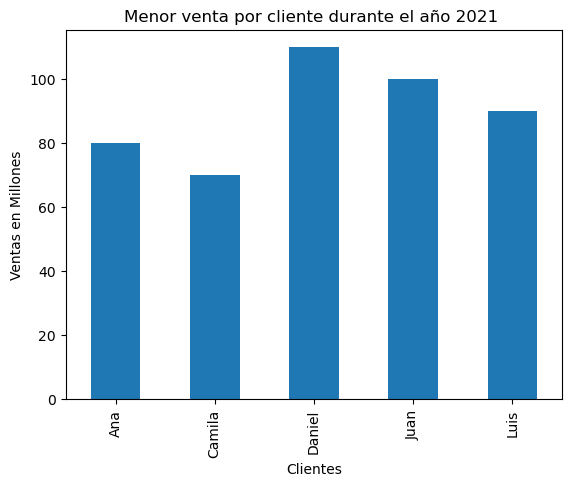

In [121]:
min_ind2 = fin.groupby("Clientes")["Ventas"].min()
print("Menor compra por cliente:")
print(min_ind2)

min_ind2.plot(kind="bar")

plt.ylabel("Ventas en Millones")
plt.title("Menor venta por cliente durante el año 2021 ")


## Máximo Individual

Mayor compra por cliente:
Clientes
Ana       100.0
Camila     70.0
Daniel    110.0
Juan      110.0
Luis      100.0
Name: Ventas, dtype: float64


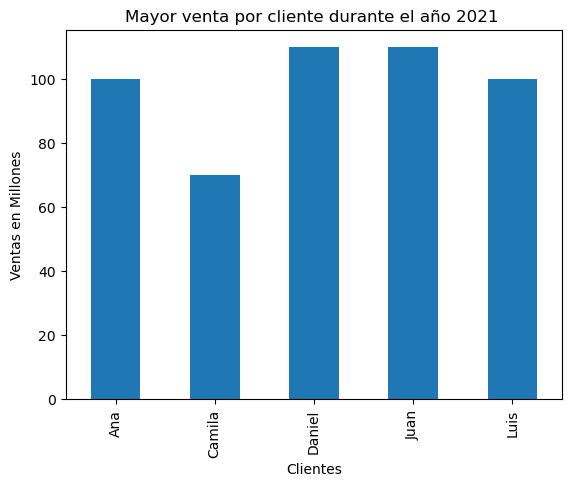

In [122]:
max_ind2 = fin.groupby("Clientes")["Ventas"].max()
print("Mayor compra por cliente:")
print(max_ind2)

max_ind2.plot(kind="bar")

plt.ylabel("Ventas en Millones")
plt.title("Mayor venta por cliente durante el año 2021 ")

plt.show()

## Correlación

In [130]:
corr_cant_compras2 = pd.DataFrame({"Media": med_ind2, "Menor compra": min_ind2, "Mayor compra": max_ind2, "Cantidad de compras": cant_compras})
print(corr_cant_compras2)

             Media  Menor compra  Mayor compra  Cantidad de compras
Ana      90.000000          80.0         100.0                    3
Camila   70.000000          70.0          70.0                    2
Daniel  110.000000         110.0         110.0                    1
Juan    103.333333         100.0         110.0                    4
Luis     95.000000          90.0         100.0                    2


## Boxplot

Ahora haremos un boxplot para revisar nuevamente que no hallan outliers.

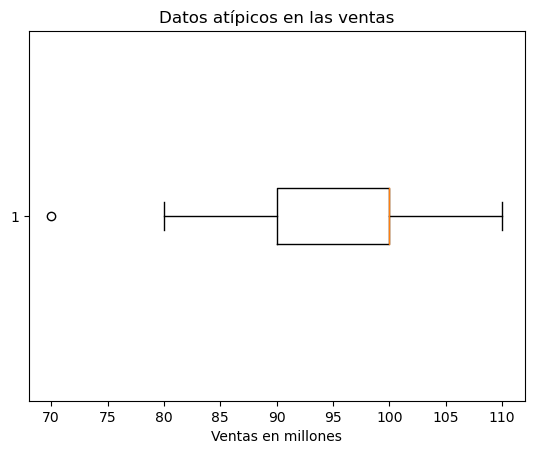

   Clientes  Ventas
0      Juan   100.0
2    Daniel   110.0
3      Luis    90.0
5       Ana    80.0
6    Camila    70.0
7       Ana   100.0
8      Luis   100.0
9      Juan   110.0
10      Ana    90.0
11     Juan   100.0


In [131]:
plt.boxplot(fin["Ventas"], vert=False)
plt.title("Datos atípicos en las ventas")
plt.xlabel("Ventas en millones")
plt.show()

print(fin)

Como pensaba al antes de ejecutar el primer Boxplot la venta por 70 millones también es un outlier, por lo que este también debemos descartarlo.

# Encontramos y descartamos el nuevo outlier

In [136]:
Q1_2 = np.quantile(fin["Ventas"], 0.25)
Q3_2 = np.quantile(fin["Ventas"], 0.75)

LI_2 = Q1_2 - 1.5 * (Q3_2 - Q1_2)
LS_2 = Q3_2 + 1.5 * (Q3_2 - Q1_2)

outliers2 = fin[(fin["Ventas"] < LI_2) | (fin["Ventas"] > LS_2)]

print("Valores atípicos:")
print(outliers2)

Valores atípicos:
  Clientes  Ventas
6   Camila    70.0


# Mostramos en pantalla el DataFrame definitivo.

In [139]:
fin2 = fin[(fin["Ventas"] >= LI_2) & (fin["Ventas"] <= LS_2)]
print(fin2)

   Clientes  Ventas
0      Juan   100.0
2    Daniel   110.0
3      Luis    90.0
5       Ana    80.0
7       Ana   100.0
8      Luis   100.0
9      Juan   110.0
10      Ana    90.0
11     Juan   100.0


# Boxplot sin datos atípicos

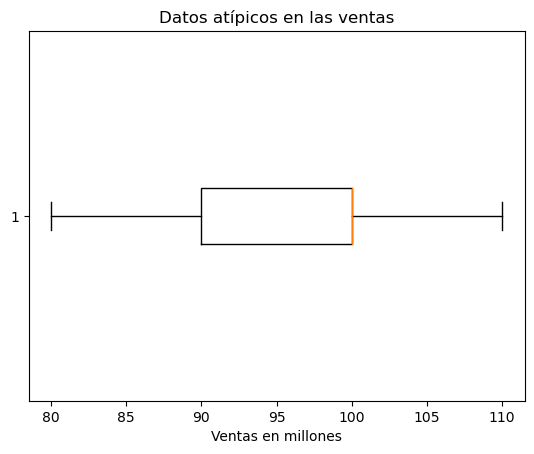

In [140]:
plt.boxplot(fin2["Ventas"], vert=False)
plt.title("Datos atípicos en las ventas")
plt.xlabel("Ventas en millones")
plt.show()